<a href="https://colab.research.google.com/github/VahapML/Denoising-Data-with-FFT/blob/main/DenoiseDataWithFFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# change the default rc (runtime configuration) settings 
plt.rcParams["figure.figsize"] = [20, 8]
plt.rcParams.update({"font.size": 15})

In [3]:
# create a simple signal with two frequencies
interval = 0.001

samples = np.arange(0, 1, interval)

print(samples.shape)

(1000,)


In [4]:
# create 2 signals with two dfiferent frequencies "Asin(2πft)"

signal1 = np.sin(2 * np.pi * 50 * samples)
signal2 = np.sin(2 * np.pi * 120 * samples)

# sum signals up
signal = signal1 + signal2
# add some noise
noisy_signal = signal + 2.5 * np.random.randn(len(samples))

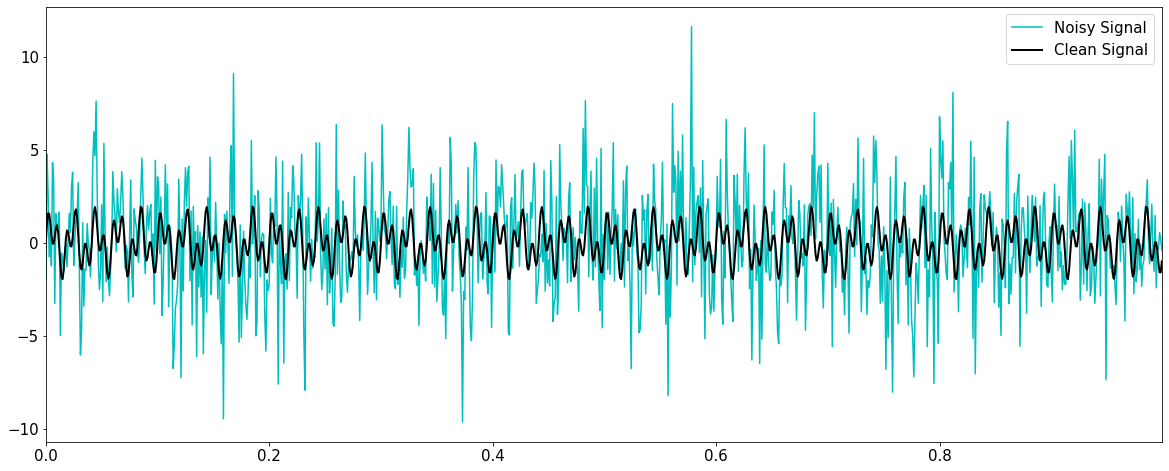

In [5]:
# plot all signals to see

plt.plot(samples, noisy_signal, color = "c", LineWidth=1.5, label="Noisy Signal")
plt.plot(samples, signal, color="k", LineWidth=2, label="Clean Signal")
plt.xlim(samples[0], samples[-1])
plt.legend()
plt.show()

In [6]:
# compute the Fast Fourier Transform (FFT)

data_length = len(samples)
# compute the FFT
fourier_coefficients = np.fft.fft(noisy_signal, data_length)

print(fourier_coefficients.shape)

# power spectrum (power per frequency)
power_sprectral_density = fourier_coefficients * np.conj(fourier_coefficients) / data_length

# create x-axis of frequencies
freq = (1 / (interval * data_length)) * np.arange(data_length)

print(freq.shape)

(1000,)
(1000,)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


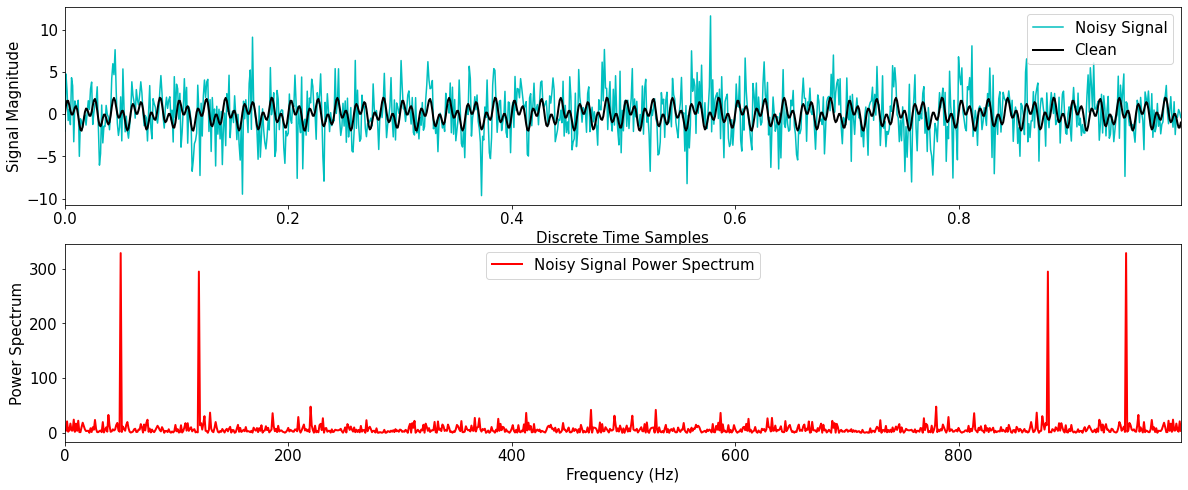

In [7]:
fig, axis = plt.subplots(2, 1)

# Set the first subplot to signals
plt.sca(axis[0])
plt.plot(samples, noisy_signal, color="c", LineWidth=1.5, label="Noisy Signal")
plt.plot(samples, signal, color="k", LineWidth=2, label="Clean")
plt.xlim(samples[0], samples[-1])
plt.xlabel("Discrete Time Samples")
plt.ylabel("Signal Magnitude")
plt.legend()

# Set the second subplot to PSD
plt.sca(axis[1])
plt.plot(freq, power_sprectral_density, color="r", LineWidth=2, label="Noisy Signal Power Spectrum")
plt.xlim(freq[0], freq[-1])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectrum")
plt.legend()
plt.show()

In [8]:
# Use the PSD to filter out noise

# find the all frequencies with large power
indices = power_sprectral_density > 100 
# zero out all other frequencies
denoised_psd = power_sprectral_density * indices
# zero out small Fourier coefficients
fourier_coefficients = indices * fourier_coefficients
# inverse FFT for filtered time signal
denoised_signal = np.fft.ifft(fourier_coefficients)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


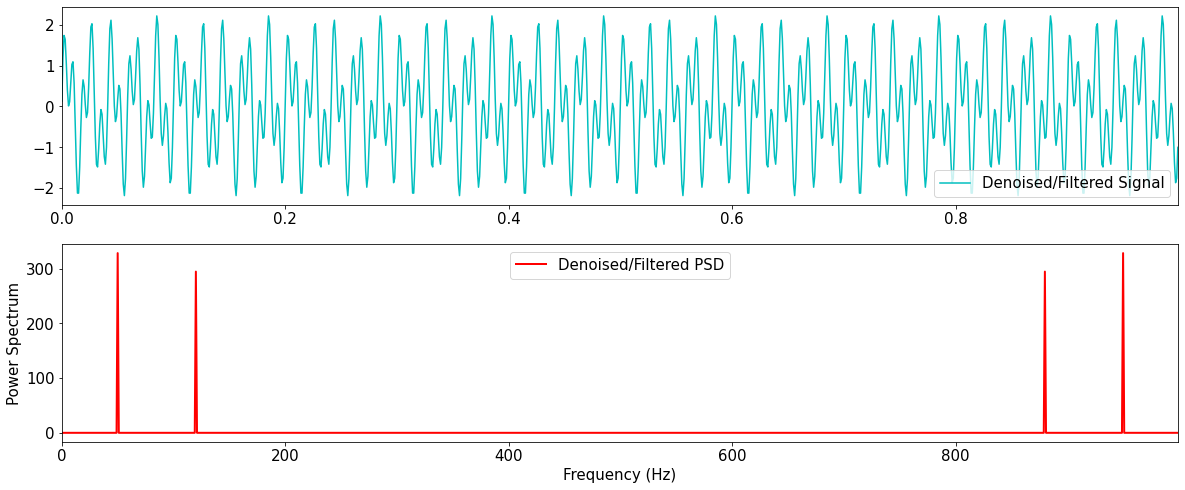

In [9]:
fig, axis = plt.subplots(2, 1)

plt.sca(axis[0])
plt.plot(samples, denoised_signal, color="c", LineWidth=1.5, label="Denoised/Filtered Signal")
plt.xlim(samples[0], samples[-1])
plt.legend()

plt.sca(axis[1])
plt.plot(freq, denoised_psd, color="r", LineWidth=2, label="Denoised/Filtered PSD")
plt.xlim(freq[0], freq[-1])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectrum")
plt.legend()
plt.show()